<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/digit_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alexandros_Tsevrenis_MTN1914***

# **Import essential libraries**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import io
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import IPython
from IPython.display import Image
import pydotplus

#pytorch utility imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import day.csv file with GOOGLE_COLAB**

In [0]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
file_train = r'/gdrive/My Drive/datasets/digit_recognizer_dataset_train.csv'
file_test = r'/gdrive/My Drive/datasets/digit_recognizer_dataset_test.csv'

In [5]:
df = pd.read_csv(file_train)
df2 = pd.read_csv(file_test)
print(df)
print(df2)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
27995      6       0       0       0  ...         0         0         0         0
27996      0       0       0       0  ...         0         0         0         0
27997      8       0       0       0  ...         0         0         0         0
27998      0       0       0       0  ...         0         0         0         0
27999      7       0       0       0  ...         0         0         0         0

[28000 rows x 7

In [6]:
print(df.shape)
print(df2.shape)

(28000, 785)
(14000, 784)


# **Plot Digit Nine from dataset**

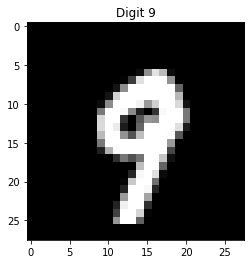

In [0]:
#nine
nine = df.iloc[28, 1:]
#print(nine.shape)
nine = nine.values.reshape(28, 28)
plt.imshow(nine, cmap='gray')
plt.title("Digit 9")
plt.show()

# **Read the dataset from the CSV file**

**Define df variable as day.csv using pandas library.
Read separated values (csv) file into DataFrame.**

In [0]:
df = pd.read_csv(io.StringIO(uploaded['digit_recognizer_dataset.csv'].decode('utf-8')))

# **Print the shape of our whole data (rows, columns)**

In [0]:
print(df.shape)


(42000, 785)


# **Firstly, split the pixelX features from the first column and store them in X, secondly store the first column as the prediction feature/variable as y**

In [0]:
X = df.iloc[:, 1:]
y = df['label']

This neural network runs on the CPU but there are commented codes that they could enable GPU usage to make it run faster(using NVIDIA feature CUDA).

Neural Network gets trained with Gradient Descent, backpropagation.

The criterion cross entropy loss has been chosen.

Dropout hyperparameter chooses to delete some information that the neural network has learned in every layer so at the end it doesn't overfit

`nn.BatchNorm1d` 
Applies Batch Normalization over a 2D or 3D input (a mini-batch of 1D inputs with optional additional channel dimension)

SoftMax hyperparameter normalize the outputs. All the numbers that softmax gets to the output they will be added to 1 and it creates percentages that belong to a specific classes.

`torch.optim.SGD`
SGD:
We know that gradient descent is the rate of loss function w.r.t the weights a.k.a model parameters. The loss function can be a function of the mean square of the losses accumulated over the entire training dataset. Hence the weights are updated once at the end of each epoch. This results in reaching the exact minimum but requires heavy computation time/epochs to reach that point.
On the other hand in SGD the weights are updated after looping via each training sample.


loop


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


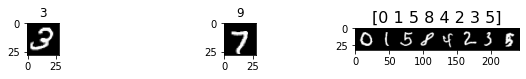

Net(
  (linear_block): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): LogSoftmax()
  )
)
test_counter:  [0, 22400, 44800, 67200, 89600, 112000, 134400, 156800, 179200, 201600]


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train Epoch: 0 [640/22400 (3%)]	Loss: 1.524198
Train Epoch: 0 [1280/22400 (6%)]	Loss: 1.116846
Train Epoch: 0 [1920/22400 (9%)]	Loss: 1.226974
Train Epoch: 0 [2560/22400 (11%)]	Loss: 1.054919
Train Epoch: 0 [3200/22400 (14%)]	Loss: 0.899038
Train Epoch: 0 [3840/22400 (17%)]	Loss: 1.146116
Train Epoch: 0 [4480/22400 (20%)]	Loss: 1.019203
Train Epoch: 0 [5120/22400 (23%)]	Loss: 0.955824
Train Epoch: 0 [5760/22400 (26%)]	Loss: 1.178229
Train Epoch: 0 [6400/22400 (29%)]	Loss: 1.067083
Train Epoch: 0 [7040/22400 (31%)]	Loss: 0.941109
Train Epoch: 0 [7680/22400 (34%)]	Loss: 0.908958
Train Epoch: 0 [8320/22400 (37%)]	Loss: 1.005577
Train Epoch: 0 [8960/22400 (40%)]	Loss: 0.934346
Train Epoch: 0 [9600/22400 (43%)]	Loss: 0.699762
Train Epoch: 0 [10240/22400 (46%)]	Loss: 1.126503
Train Epoch: 0 [10880/22400 (49%)]	Loss: 1.023463
Train Epoch: 0 [11520/22400 (51%)]	Loss: 0.692571
Train Epoch: 0 [12160/22400 (54%)]	Loss: 0.974894
Train Epoch: 0 [12800/22400 (57%)]	Loss: 1.111850
Train Epoch: 0 [134

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


test_loss:  [0.45679348707199097]

Average Val Loss: 0.4568, Val Accuracy: 5034/5600 (89.893%)

Train Epoch: 1 [640/22400 (3%)]	Loss: 0.781278
Train Epoch: 1 [1280/22400 (6%)]	Loss: 0.931352
Train Epoch: 1 [1920/22400 (9%)]	Loss: 0.921959
Train Epoch: 1 [2560/22400 (11%)]	Loss: 0.773923
Train Epoch: 1 [3200/22400 (14%)]	Loss: 0.711213
Train Epoch: 1 [3840/22400 (17%)]	Loss: 0.710064
Train Epoch: 1 [4480/22400 (20%)]	Loss: 0.818816
Train Epoch: 1 [5120/22400 (23%)]	Loss: 0.879777
Train Epoch: 1 [5760/22400 (26%)]	Loss: 0.954620
Train Epoch: 1 [6400/22400 (29%)]	Loss: 0.803421
Train Epoch: 1 [7040/22400 (31%)]	Loss: 0.757910
Train Epoch: 1 [7680/22400 (34%)]	Loss: 1.122243
Train Epoch: 1 [8320/22400 (37%)]	Loss: 0.965690
Train Epoch: 1 [8960/22400 (40%)]	Loss: 0.972484
Train Epoch: 1 [9600/22400 (43%)]	Loss: 0.831053
Train Epoch: 1 [10240/22400 (46%)]	Loss: 0.798606
Train Epoch: 1 [10880/22400 (49%)]	Loss: 0.814593
Train Epoch: 1 [11520/22400 (51%)]	Loss: 0.894524
Train Epoch: 1 [12160/2

In [93]:
if __name__ == '__main__':
    # stops the freeze error
    torch.multiprocessing.freeze_support()
    print('loop')

    # GPU CUDA
    # check cuda version
    #print(torch.cuda.is_available())
    #print(torch.backends.cudnn.enabled)
    #if torch.cuda.is_available():
    #    device = torch.device('cuda')
    #print(device)

    train_df = df
    test_df = df2
    #train_df = df.iloc[:28000, :]
    #test_df = df.iloc[28000:, :]

    y_train = train_df['label'].values
    X_train = (train_df.iloc[:, 1:].values).astype('float32')
    test_images = (test_df.iloc[:, :].values).astype('float32')

    # Training and Validation Split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                                          stratify=y_train, random_state=123,
                                                                          test_size=0.20)
    X_train = X_train.reshape(X_train.shape[0], 28, 28)
    X_val = X_val.reshape(X_val.shape[0], 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 28, 28)

    # train samples
    for i in range(6, 9):
        plt.subplot(330 + (i + 1))
        plt.imshow(X_train[i].squeeze(), cmap=plt.get_cmap('gray'))
        plt.title(y_train[i])

    # test samples
    for i in range(6, 9):
        plt.subplot(330 + (i + 1))
        plt.imshow(test_images[i].squeeze(), cmap=plt.get_cmap('gray'))


    # train
    X_train_tensor = torch.tensor(X_train) / 255.0
    y_train_tensor = torch.tensor(y_train)
    train_tensor = TensorDataset(X_train_tensor, y_train_tensor)

    # val
    X_val_tensor = torch.tensor(X_val) / 255.0
    y_val_tensor = torch.tensor(y_val)
    val_tensor = TensorDataset(X_val_tensor, y_val_tensor)

    # test
    test_images_tensor = torch.tensor(test_images) / 255.0

    train_loader = DataLoader(train_tensor, batch_size=64, num_workers=2, shuffle=True)
    val_loader = DataLoader(val_tensor, batch_size=64, num_workers=2, shuffle=True)
    test_loader = DataLoader(test_images_tensor, batch_size=64, num_workers=2, shuffle=False)

    for batch_idx, (data, target) in enumerate(train_loader):
        img_grid = make_grid(data[0:8, ].unsqueeze(1), nrow=8)
        img_target_labels = target[0:8, ].numpy()
        break

    plt.imshow(img_grid.numpy().transpose((1, 2, 0)))
    plt.rcParams['figure.figsize'] = (10, 2)
    plt.title(img_target_labels, size=16)
    plt.show()



    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()


            self.linear_block = nn.Sequential(
                nn.Linear(784, 10),
                nn.BatchNorm1d(10),
                nn.ReLU(inplace=True),
                nn.Dropout(0.2),
                nn.LogSoftmax(dim=1)
            )

        def forward(self, x):
            #x = self.conv_block(x)
            x = x.view(x.size(0), -1)
            x = self.linear_block(x)

            return x

    network_model = Net()
    print(network_model)

    optimizer = optim.SGD(params=network_model.parameters(), lr=0.1, momentum=0.9)
    #optimizer = optim.Adam(params=network_model.parameters(), lr=0.001, momentum)
    criterion = nn.CrossEntropyLoss()
    exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # GPU CUDA
    #if torch.cuda.is_available():
    #    network_model = network_model.cuda()
    #    criterion = criterion.cuda()

    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(10)]
    print('test_counter: ', test_counter)

    def train_model(num_epoch):
        network_model.train()
        exp_lr_scheduler.step()

        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            optimizer.zero_grad()
            output = network_model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            if( (batch_idx+1) % 10 == 0 ):
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    num_epoch, (batch_idx+1) * len(data), len(train_loader.dataset),
                               100. * (batch_idx+1) / len(train_loader), loss.data))
                train_losses.append(loss.item())
                train_counter.append( (batch_idx+64)+ ((num_epoch)*len(train_loader.dataset)))


    def evaluate(data_loader):
        network_model.eval()
        loss = 0
        correct = 0

        for data, target in data_loader:
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            output = network_model(data)

            loss += F.cross_entropy(output, target, size_average=False).data
            

            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        loss /= len(data_loader.dataset)
        test_losses.append(loss.item())
        print('test_loss: ', test_losses)

        print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(loss, correct, len(data_loader.dataset),
                                                                                   100. * correct / len(data_loader.dataset)))

    num_epochs = 10

    for n in range(num_epochs):
        train_model(n)
        evaluate(val_loader)

    def make_predictions(data_loader):
        network_model.eval()
        test_preds = torch.LongTensor()

        for i, data in enumerate(data_loader):
            data = data.unsqueeze(1)

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()

            output = network_model(data)

            preds = output.cpu().data.max(1, keepdim=True)[1]
            test_preds = torch.cat((test_preds, preds), dim=0)

        return test_preds

    test_set_preds = make_predictions(test_loader)



    ImageId  Label
0         1      3
1         2      1
2         3      3
3         4      7
4         5      0
5         6      1
6         7      3
7         8      7
8         9      2
9        10      8
10       11      7
11       12      1
12       13      7
13       14      2
14       15      9
15       16      6


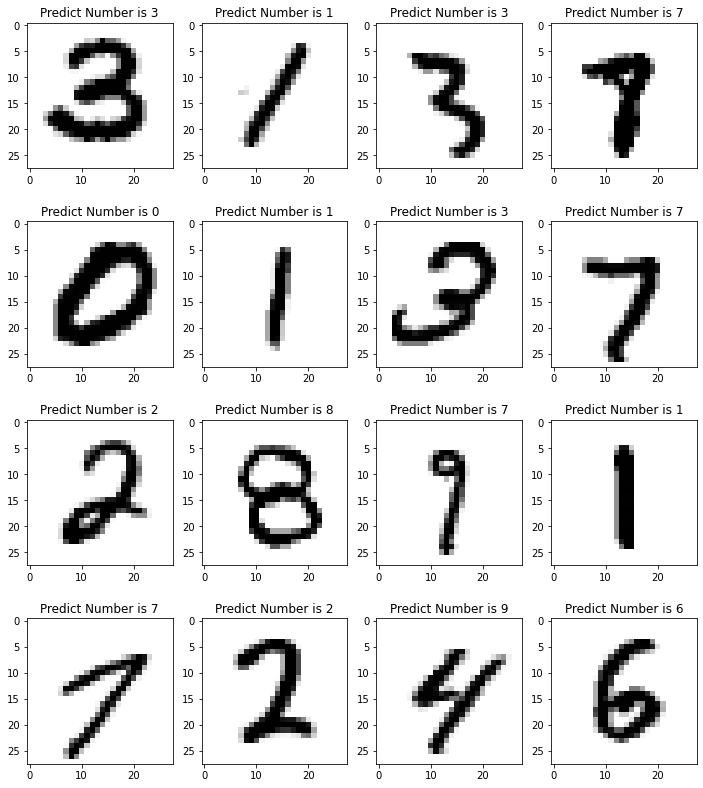

In [94]:
sample_subm = r'/gdrive/My Drive/datasets/sample_submission.csv'
submission_df = pd.read_csv(sample_subm)    

submission_df['Label'] = test_set_preds.numpy().squeeze()
print(submission_df.iloc[:16, :2])
#submission_df.head()
#print(test_set_preds)
y_pred = submission_df['Label'].values

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i], cmap='binary')
    ax.set(title = f"Predict Number is {y_pred[i]}");


`optim.Adam` Adam’s method considered as a method of Stochastic Optimization is a technique implementing adaptive learning rate. Whereas in normal SGD the learning rate has an equivalent type of effect for all the weights/parameters of the model.

`self.linear_block2.apply(init_weights)`
Apply Havier initialization Recursively

In [127]:
    class Net2(nn.Module):
        def __init__(self):
            super(Net2, self).__init__()

            #self.conv_block = nn.Sequential(
            #    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            #    nn.BatchNorm2d(32),
            #    nn.ReLU(inplace=True),
            #    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            #    nn.BatchNorm2d(64),
            #    nn.ReLU(inplace=True),
            #    nn.MaxPool2d(kernel_size=2, stride=2),
            #    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            #    nn.BatchNorm2d(128),
            #    nn.ReLU(inplace=True),
            #    nn.MaxPool2d(kernel_size=2, stride=2)
            #)

#MAXPOOLING
            #self.linear_block = nn.Sequential(
            #    nn.Linear(784, 10),
            #    nn.BatchNorm1d(10),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.LogSoftmax(dim=1)
            #)
            
            def init_weights(m):
                if type(m) == nn.Linear:
                    #nn.init.xavier_normal(m.weight)
                    nn.init.xavier_uniform(m.weight)
                    m.bias.data.fill_(0.01)

            self.linear_block2 = nn.Sequential(
                nn.Linear(784, 400),
                nn.BatchNorm1d(400),
                nn.ReLU(inplace=True),
                nn.Dropout(0.3),
                nn.Linear(400, 200),
                nn.BatchNorm1d(200),
                nn.ReLU(inplace=True),
                nn.Dropout(0.3),
                nn.Linear(200, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(inplace=True),
                nn.Dropout(0.4),
                nn.Linear(64, 10),
                #nn.MaxPool2d(kernel_size=2),
                nn.LogSoftmax(dim=1)
            )
            #self.linear_block2 = nn.Sequential(
            #    nn.Linear(784, 128),
            #    nn.BatchNorm1d(128),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(128, 64),
            #    nn.BatchNorm1d(64),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(64, 10),
            #    #nn.MaxPool2d(kernel_size=2),
            #    nn.LogSoftmax(dim=1)
            #)
            #self.linear_block2 = nn.Sequential(
            #    nn.Linear(784, 300),
            #    nn.BatchNorm1d(300),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(300, 200),
            #    nn.BatchNorm1d(200),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(200, 128),
            #    nn.BatchNorm1d(128),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(128, 64),
            #    nn.BatchNorm1d(64),
            #    nn.ReLU(inplace=True),
            #    nn.Dropout(0.2),
            #    nn.Linear(64, 10),
            #    #nn.MaxPool2d(kernel_size=2),
            #    nn.LogSoftmax(dim=1)
            #)

            #APPLY HAVIER INITIALIZATION RECURSIVELY 
            self.linear_block2.apply(init_weights)

            #input_size = 784
            #hidden_sizes = [128 , 64]
            #output_size = 10

            #model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
            #          nn.ReLU(),
            #          nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            #          nn.ReLU(),
            #          nn.Linear(hidden_sizes[1], output_size),
            #          nn.LogSoftmax(dim=1))
            #print(model)

        def forward(self, x):
            #x = self.conv_block(x)
            x = x.view(x.size(0), -1)
            x = self.linear_block2(x)

            return x

    network_model2 = Net2()
    print(network_model2)

    optimizer2 = optim.Adam(params=network_model2.parameters(), lr=0.003)
    #optimizer2 = optim.SGD(params=network_model2.parameters(), lr=0.001, momentum=1)
    criterion2 = nn.CrossEntropyLoss()
    exp_lr_scheduler2 = optim.lr_scheduler.StepLR(optimizer2, step_size=7, gamma=0.1)


    # GPU CUDA
    #if torch.cuda.is_available():
    #    network_model = network_model.cuda()
    #    criterion = criterion.cuda()

    train_losses2 = []
    train_counter2 = []
    test_losses2 = []
    test_counter2 = [i*len(train_loader.dataset) for i in range(25)]
    #print('test_counter: ', test_counter2)

    def train_model2(num_epoch):
        network_model2.train()
        exp_lr_scheduler2.step()


        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            optimizer2.zero_grad()
            output2 = network_model2(data)
            loss2 = criterion(output2, target)
            loss2.backward()
            optimizer2.step()

            if( (batch_idx+1) % 10 == 0 ):
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    num_epoch, (batch_idx+1) * len(data), len(train_loader.dataset),
                               100. * (batch_idx+1) / len(train_loader), loss2.data))
                train_losses2.append(loss2.item())
                train_counter2.append( (batch_idx+64)+ ((num_epoch)*len(train_loader.dataset)))
            #if( (batch_idx + 1) % 100 == 0 ):
            #    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            #        num_epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
            #                   100. * (batch_idx + 1) / len(train_loader), loss2.data))
            #    train_losses2.append(loss2.item())
            #    train_counter2.append( (batch_idx+64)+ ((num_epoch-1)*len(train_loader.dataset)))


    def evaluate2(data_loader):
        network_model2.eval()
        loss2 = 0
        correct2 = 0

        for data, target in data_loader:
            data = data.unsqueeze(1)
            data, target = data, target

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()
            #    target = target.cuda()

            output2 = network_model2(data)

            loss2 += F.cross_entropy(output2, target, size_average=False).data
            

            pred2 = output2.data.max(1, keepdim=True)[1]
            correct2 += pred2.eq(target.data.view_as(pred2)).cpu().sum()

        loss2 /= len(data_loader.dataset)
        test_losses2.append(loss2.item())
        #print('test_loss: ', test_losses)

        print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(loss2, correct2, len(data_loader.dataset),
                                                                                   100. * correct2 / len(data_loader.dataset)))

    num_epochs = 25

    for n in range(num_epochs):
        train_model2(n)
        evaluate2(val_loader)

    #better_model
    #for n in range(25):
    #    train_model(n)
    #    evaluate(val_loader)

    def make_predictions2(data_loader):
        network_model2.eval()
        test_preds2 = torch.LongTensor()

        for i, data in enumerate(data_loader):
            data = data.unsqueeze(1)

            # GPU CUDA
            #if torch.cuda.is_available():
            #    data = data.cuda()

            output2 = network_model2(data)

            preds2 = output2.cpu().data.max(1, keepdim=True)[1]
            test_preds2 = torch.cat((test_preds2, preds2), dim=0)

        return test_preds2

    test_set_preds2 = make_predictions2(test_loader)


Net2(
  (linear_block2): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=400, out_features=200, bias=True)
    (5): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=200, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=64, out_features=10, bias=True)
    (13): LogSoftmax()
  )
)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train Epoch: 0 [640/22400 (3%)]	Loss: 1.175821
Train Epoch: 0 [1280/22400 (6%)]	Loss: 1.102405
Train Epoch: 0 [1920/22400 (9%)]	Loss: 0.854206
Train Epoch: 0 [2560/22400 (11%)]	Loss: 0.445851
Train Epoch: 0 [3200/22400 (14%)]	Loss: 0.540717
Train Epoch: 0 [3840/22400 (17%)]	Loss: 0.525193
Train Epoch: 0 [4480/22400 (20%)]	Loss: 0.590751
Train Epoch: 0 [5120/22400 (23%)]	Loss: 0.763079
Train Epoch: 0 [5760/22400 (26%)]	Loss: 0.293998
Train Epoch: 0 [6400/22400 (29%)]	Loss: 0.524012
Train Epoch: 0 [7040/22400 (31%)]	Loss: 0.384968
Train Epoch: 0 [7680/22400 (34%)]	Loss: 0.342085
Train Epoch: 0 [8320/22400 (37%)]	Loss: 0.308411
Train Epoch: 0 [8960/22400 (40%)]	Loss: 0.249696
Train Epoch: 0 [9600/22400 (43%)]	Loss: 0.441744
Train Epoch: 0 [10240/22400 (46%)]	Loss: 0.697652
Train Epoch: 0 [10880/22400 (49%)]	Loss: 0.234417
Train Epoch: 0 [11520/22400 (51%)]	Loss: 0.310094
Train Epoch: 0 [12160/22400 (54%)]	Loss: 0.420481
Train Epoch: 0 [12800/22400 (57%)]	Loss: 0.406208
Train Epoch: 0 [134

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Val Loss: 0.1676, Val Accuracy: 5309/5600 (94.804%)

Train Epoch: 1 [640/22400 (3%)]	Loss: 0.141406
Train Epoch: 1 [1280/22400 (6%)]	Loss: 0.174081
Train Epoch: 1 [1920/22400 (9%)]	Loss: 0.377308
Train Epoch: 1 [2560/22400 (11%)]	Loss: 0.289589
Train Epoch: 1 [3200/22400 (14%)]	Loss: 0.329610
Train Epoch: 1 [3840/22400 (17%)]	Loss: 0.373868
Train Epoch: 1 [4480/22400 (20%)]	Loss: 0.255807
Train Epoch: 1 [5120/22400 (23%)]	Loss: 0.266171
Train Epoch: 1 [5760/22400 (26%)]	Loss: 0.280656
Train Epoch: 1 [6400/22400 (29%)]	Loss: 0.271911
Train Epoch: 1 [7040/22400 (31%)]	Loss: 0.300151
Train Epoch: 1 [7680/22400 (34%)]	Loss: 0.304355
Train Epoch: 1 [8320/22400 (37%)]	Loss: 0.202567
Train Epoch: 1 [8960/22400 (40%)]	Loss: 0.223316
Train Epoch: 1 [9600/22400 (43%)]	Loss: 0.393515
Train Epoch: 1 [10240/22400 (46%)]	Loss: 0.277197
Train Epoch: 1 [10880/22400 (49%)]	Loss: 0.261861
Train Epoch: 1 [11520/22400 (51%)]	Loss: 0.196188
Train Epoch: 1 [12160/22400 (54%)]	Loss: 0.369037
Train E

    ImageId  Label
0         1      3
1         2      1
2         3      3
3         4      7
4         5      0
5         6      1
6         7      3
7         8      7
8         9      2
9        10      8
10       11      7
11       12      1
12       13      7
13       14      2
14       15      4
15       16      6


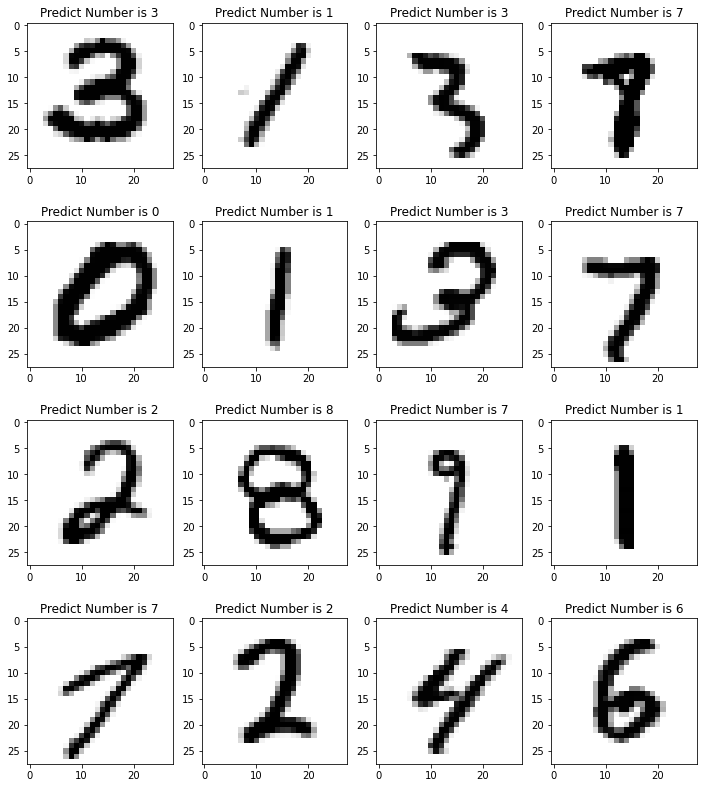

In [128]:
sample_subm = r'/gdrive/My Drive/datasets/sample_submission.csv'
submission_df2 = pd.read_csv(sample_subm)    

submission_df2['Label'] = test_set_preds2.numpy().squeeze()
print(submission_df2.iloc[:16, :2])
#submission_df.head()
#print(test_set_preds)
y_pred2 = submission_df2['Label'].values

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i], cmap='binary')
    ax.set(title = f"Predict Number is {y_pred2[i]}");



# **Plot Negative Log Likelihood**

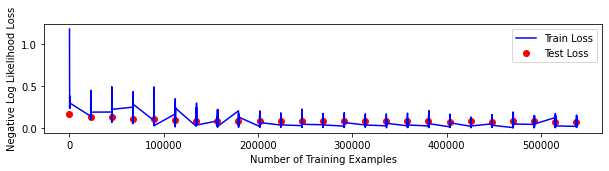

In [129]:
    fig = plt.figure()
    plt.plot(train_counter2, train_losses2, color='blue')
    plt.scatter(test_counter2, test_losses2, color='red')
    plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Negative Log Likelihood Loss')
    plt.show()
